In [491]:
import pandas as pd
import numpy as np

import seaborn as sns

In [492]:
df1 = pd.read_csv('pump1.csv')
df2 = pd.read_csv('pump2.csv')

In [493]:
df2.shape

(59400, 40)

In [494]:
df1

id    status_group
0      69572      functional
1       8776      functional
2      34310      functional
3      67743  non functional
4      19728      functional
...      ...             ...
59395  60739      functional
59396  27263      functional
59397  37057      functional
59398  31282      functional
59399  26348      functional

[59400 rows x 2 columns]

In [495]:
df2.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [496]:
df2['id'].duplicated().any()

False

In [497]:
### Relevant features we want to include for modeling
display((df['funder']==0).sum())
display((df['scheme_management']==0).sum())
display((df['scheme_name']==0).sum())
display((df['extraction_type_group']==0).sum())
display((df['management']==0).sum())
display((df['water_quality']==0).sum())
display((df['quantity']==0).sum())
display((df['amount_tsh']==0).sum())
display((df['construction_year']==0).sum())
display((df['population']==0).sum())
display((df['gps_height']==0).sum())
display((df['public_meeting']==0).sum())
display((df['permit']==0).sum())

0

0

0

0

0

0

0

32547

16203

17111

16170

4351

15350

## Dropping NaNs

In [498]:
df2.dropna(subset=['funder', 'scheme_management', 'public_meeting', 'permit'], inplace=True)

In [499]:
df2.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                   38
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 363
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management            0
scheme_name              20502
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### Concatting DataFrame 1

In [500]:
df1.set_index('id')
df2.set_index('id')
df = pd.concat([df1,df2], axis=1)

In [501]:
df.isna().sum()

id                           0
status_group                 0
id                       10711
amount_tsh               10711
date_recorded            10711
funder                   10711
gps_height               10711
installer                10749
longitude                10711
latitude                 10711
wpt_name                 10711
num_private              10711
basin                    10711
subvillage               11074
region                   10711
region_code              10711
district_code            10711
lga                      10711
ward                     10711
population               10711
public_meeting           10711
recorded_by              10711
scheme_management        10711
scheme_name              31213
permit                   10711
construction_year        10711
extraction_type          10711
extraction_type_group    10711
extraction_type_class    10711
management               10711
management_group         10711
payment                  10711
payment_

In [503]:
col = list(df.columns.values)

In [512]:
col[1:5]

['status_group', 'id', 'amount_tsh', 'date_recorded']

In [502]:
### df1 has 11k extra rows

df.dropna(inplace=True)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 59400 but corresponding boolean dimension is 41

In [429]:
df['amount_tsh'].isnull().sum()

0

In [430]:
(df['amount_tsh']==0).sum()

15679

In [431]:
ax = sns.distplot(x=df['amount_tsh'], showfliers= False)

TypeError: distplot() got an unexpected keyword argument 'x'

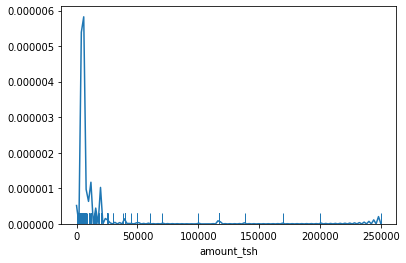

In [432]:
ax = sns.distplot(df['amount_tsh'], bins=100, hist=False, rug=True)

In [433]:
df['amount_tsh'].median()

0.0

In [434]:
df['amount_tsh'].describe()

count     27813.000000
mean        480.497983
std        3537.308629
min           0.000000
25%           0.000000
50%           0.000000
75%         150.000000
max      250000.000000
Name: amount_tsh, dtype: float64

In [435]:
df['construction_age'] = 2014 - df['construction_year']

In [436]:
df['construction_age'].isnull().sum()

0

In [437]:
df['construction_age'] = df['construction_age'].replace(2014, 0)

In [438]:
df['construction_age'].isnull().sum()

0

In [439]:
df['construction_age'].describe()

count    27813.000000
mean        14.362780
std         13.934231
min          0.000000
25%          3.000000
50%          9.000000
75%         25.000000
max         54.000000
Name: construction_age, dtype: float64

In [440]:
df['construction_age'].median()

9.0

In [441]:
(df['construction_age']==0).sum()

5879

In [442]:
df['construction_year'].isnull().sum()

0

In [443]:
(df['construction_year']==0).sum()

5879

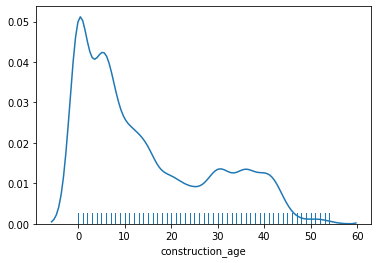

In [444]:
ax = sns.distplot(df['construction_age'], hist=False, rug=True)

In [445]:
df['population'].describe()

count    27813.000000
mean       166.354582
std        371.835783
min          0.000000
25%          1.000000
50%         52.000000
75%        200.000000
max      15300.000000
Name: population, dtype: float64

In [446]:
df['construction_age'].isnull().sum()

0

In [449]:
(df['population']==0).sum()

6730

In [405]:
df= df[(df[['population']] != 0).all(axis=1)]
df= df[(df[['construction_age']] != 0).all(axis=1)]

In [406]:
(df['population']==0).sum()
(df['construction_age']==0).sum()

0

In [450]:
df['population'].isnull().sum()

0

In [451]:
df.isna().sum()

id                       0
status_group             0
id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
s

In [452]:
df['construction_age'].isnull().sum()

0

In [453]:
df.population.astype('float')
df.construction_age.astype('float')

0        15.0
2         5.0
5         5.0
13        5.0
14        0.0
         ... 
59381    22.0
59382     6.0
59391    47.0
59395    15.0
59396    18.0
Name: construction_age, Length: 27813, dtype: float64

In [454]:
(df['public_meeting']==0).sum()

1891

In [466]:
df.dtypes

id                         int64
status_group              object
id                       float64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height               float64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private              float64
basin                     object
subvillage                object
region                    object
region_code              float64
district_code            float64
lga                       object
ward                      object
population               float64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year        float64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management

In [396]:
df.to_csv('cleaned_df2df1_train.csv')